In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx

In [24]:
import random 
%matplotlib inline

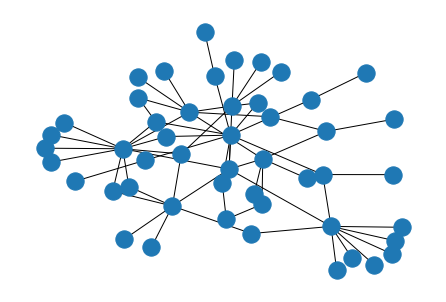

In [137]:
df= pd.read_csv('reddit_worldnews_start_to_2016-11-22.csv',sep=',',nrows=100)
G=nx.from_pandas_edgelist(df,"author","up_votes","title")
nx.draw(G)

In [105]:
nx.edge_betweenness_centrality(G)

{('polar', 3): 0.04543350168350169,
 ('polar', 2): 0.04278799903799905,
 (3, 'JoeyRamone63'): 0.08420459453622722,
 (3, 'Moldavite'): 0.17695654921420229,
 (3, 'Armagedonovich'): 0.07993197278911564,
 (3, 'greenascanbe'): 0.07993197278911564,
 (3, 'psogle'): 0.06313490222928998,
 (3, 'silence_hr'): 0.059817410008736555,
 (3, 'EllieElliott'): 0.04427035785454154,
 (3, 'andy4443'): 0.07993197278911564,
 (2, 'Moldavite'): 0.10185697475238295,
 (2, 'mlawless1138'): 0.03313335615631534,
 (2, 'acurlin'): 0.04081632653061224,
 (2, 'dizzle67'): 0.07129194029704235,
 (2, 'MarquisdeBad'): 0.04081632653061224,
 (2, 'unikah'): 0.04081632653061224,
 ('fadi420', 1): 0.04081632653061224,
 (1, 'Aerik'): 0.04081632653061224,
 (1, 'markansoul'): 0.04081632653061224,
 (1, 'Moldavite'): 0.12207414892363874,
 (1, 'buddhazen'): 0.04081632653061224,
 (1, 'nbsp'): 0.03382565327718387,
 (1, 'silence_hr'): 0.048942504490973884,
 (1, 'mlawless1138'): 0.0341035169479047,
 (1, 'EllieElliott'): 0.046693827242296614

In [106]:
my_edge_betweenness = nx.edge_betweenness_centrality(G)


In [107]:
my_edge_betweenness

{('polar', 3): 0.04543350168350169,
 ('polar', 2): 0.04278799903799905,
 (3, 'JoeyRamone63'): 0.08420459453622722,
 (3, 'Moldavite'): 0.17695654921420229,
 (3, 'Armagedonovich'): 0.07993197278911564,
 (3, 'greenascanbe'): 0.07993197278911564,
 (3, 'psogle'): 0.06313490222928998,
 (3, 'silence_hr'): 0.059817410008736555,
 (3, 'EllieElliott'): 0.04427035785454154,
 (3, 'andy4443'): 0.07993197278911564,
 (2, 'Moldavite'): 0.10185697475238295,
 (2, 'mlawless1138'): 0.03313335615631534,
 (2, 'acurlin'): 0.04081632653061224,
 (2, 'dizzle67'): 0.07129194029704235,
 (2, 'MarquisdeBad'): 0.04081632653061224,
 (2, 'unikah'): 0.04081632653061224,
 ('fadi420', 1): 0.04081632653061224,
 (1, 'Aerik'): 0.04081632653061224,
 (1, 'markansoul'): 0.04081632653061224,
 (1, 'Moldavite'): 0.12207414892363874,
 (1, 'buddhazen'): 0.04081632653061224,
 (1, 'nbsp'): 0.03382565327718387,
 (1, 'silence_hr'): 0.048942504490973884,
 (1, 'mlawless1138'): 0.0341035169479047,
 (1, 'EllieElliott'): 0.046693827242296614

In [113]:
my_edge_betweenness.get(('polar', 'Scores killed in Pakistan clashes'))

In [114]:
max(my_edge_betweenness, key=my_edge_betweenness.get)

(4, 'Moldavite')

In [115]:
max(G.edges(), key=my_edge_betweenness.get)

(3, 'Moldavite')

In [116]:


my_edge_betweenness = nx.edge_betweenness_centrality(G)
most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
G.remove_edge(*most_valuable_edge)



In [117]:
nx.connected_components(G)

<generator object connected_components at 0x000001FBBA534C80>

In [118]:


list(nx.connected_components(G))



[{0,
  1,
  10,
  12,
  14,
  15,
  2,
  20,
  3,
  4,
  5,
  6,
  62,
  7,
  8,
  9,
  'Aerik',
  'Armagedonovich',
  'Clythos',
  'EllieElliott',
  'JoeyRamone63',
  'MarquisdeBad',
  'MikaelMN',
  'Moldavite',
  'acurlin',
  'andy4443',
  'bgholt1970',
  'buddhazen',
  'dizzle67',
  'emoticon',
  'fadi420',
  'greenascanbe',
  'kevin143',
  'key95',
  'maaz',
  'markansoul',
  'mhermans',
  'mlawless1138',
  'moderns2007',
  'nbsp',
  'organicbm',
  'polar',
  'psogle',
  'rmuser',
  'safetyisoverrated',
  'silence_hr',
  'smacfarl',
  'unikah',
  'wahabuddin'}]

In [119]:
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)

In [120]:
len(partition_sequence), nx.karate_club_graph().number_of_edges()

(60, 78)

In [121]:
len(partition_sequence[0])

2

In [125]:
modularity_sequence = [modularity(G, p) for p in partition_sequence]
modularity_sequence

[0.23296045785639954,
 0.23296045785639954,
 0.23296045785639954,
 0.23296045785639954,
 0.23296045785639954,
 0.23296045785639954,
 0.4426378772112383,
 0.4426378772112383,
 0.4426378772112383,
 0.5309573361082206,
 0.5309573361082206,
 0.5296566077003121,
 0.5296566077003121,
 0.5455254942767951,
 0.5379812695109262,
 0.530697190426639,
 0.5219823100936525,
 0.5144380853277837,
 0.5029916753381894,
 0.4914151925078044,
 0.47970863683662857,
 0.4698231009365245,
 0.45993756503642047,
 0.4481009365244538,
 0.43405306971904273,
 0.4220863683662851,
 0.4079084287200832,
 0.3958116545265349,
 0.3830645161290323,
 0.36849635796045793,
 0.356009365244537,
 0.3410509885535901,
 0.3263527575442248,
 0.3115244536940688,
 0.3115244536940688,
 0.29877731529656615,
 0.29877731529656615,
 0.2725026014568159,
 0.26066597294484917,
 0.24557752341311137,
 0.24557752341311137,
 0.2302289281997919,
 0.21540062434963578,
 0.2001821019771072,
 0.1847034339229969,
 0.16974505723205,
 0.15465660770031223,


In [126]:


def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W



Text(0.5, 0, 'Algorithm step')

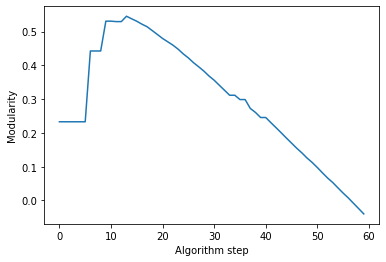

In [127]:


import matplotlib.pyplot as plt
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')



In [129]:
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)

In [130]:
best_partition

[{15,
  3,
  62,
  8,
  'Armagedonovich',
  'EllieElliott',
  'andy4443',
  'greenascanbe',
  'polar',
  'silence_hr'},
 {2, 'MarquisdeBad', 'acurlin', 'unikah'},
 {0,
  1,
  'Aerik',
  'Moldavite',
  'buddhazen',
  'fadi420',
  'kevin143',
  'markansoul',
  'mlawless1138',
  'nbsp',
  'organicbm',
  'wahabuddin'},
 {4,
  6,
  'JoeyRamone63',
  'bgholt1970',
  'emoticon',
  'key95',
  'mhermans',
  'moderns2007',
  'rmuser',
  'safetyisoverrated'},
 {12, 5, 'Clythos', 'MikaelMN', 'maaz', 'psogle'},
 {10, 14, 20, 7, 9, 'dizzle67', 'smacfarl'}]

In [132]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

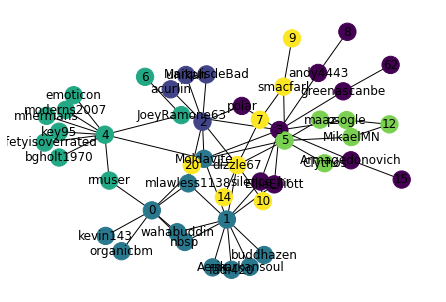

In [133]:


best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

